In [16]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

# Область работы 1 (библиотеки)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

# Область работы 2 (выполнение лучшей модели)

In [18]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [19]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

In [20]:
train = pd.read_csv(path_train)

# выбранные столбцы
col = ['0', '2', '4', '12', '16', '18', '22', '24', '25', '27']

X_train = train[col]
y_train = train['price']


In [21]:
#результат

num_feat = ['0', '2', '4', '12', '16', '18', '22', '24', '25', '27']

num = Pipeline(
       [('scaler', Normalizer())])


CT = ColumnTransformer([
    ("num", num, num_feat)
])





knn = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor(algorithm='ball_tree', n_neighbors=31, p = 2, weights = 'uniform'))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


rf = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor(criterion = 'absolute_error',
                                                                   max_depth = None,
                                                                   max_features = 'sqrt',
                                                                   min_samples_leaf = 2,
                                                                   min_samples_split = 2,
                                                                   n_estimators = 1000,
                                                                   oob_score = True))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

ridge = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(solver='sag', alpha=5, max_iter = 10000))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

lasso = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(alpha = 0, max_iter = 10000))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


In [22]:
estimators = [
    ('knn', knn),
    ('rf', rf),
    ('ridge', ridge),
    ('lasso', lasso)
]

vt_reg = VotingRegressor(estimators = estimators)

vt_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('knn',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('preproc',
                                                                                                    ColumnTransformer(transformers=[('num',
                                                                                                                                     Pipeline(steps=[('scaler',
                                                                                                                                                      Normalizer())]),
                                                                                                                                     ['0',
                                                                                                                                      '2',
                                                                                                                                      '4',
                                                                                                                                      '12',
                                                                                                                                      '16',
                                                                                                                                      '18',
                                                                                                                                      '22',
                                                                                                                                      '24',
                                                                                                                                      '25',
                                                                                                                                      '27'])])),
                                                                                                   ('estimator',
                                                                                                    KNeighborsRegressor(algorithm='ball_tree',
                                                                                                                        n_neighbors=31))]...
                                                                         transformer=PowerTransformer()))])),
                            ('lasso',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('preproc',
                                                                                                    ColumnTransformer(transformers=[('num',
                                                                                                                                     Pipeline(steps=[('scaler',
                                                                                                                                                      Normalizer())]),
                                                                                                                                     ['0',
                                                                                                                                      '2',
                                                                                                                                      '4',
                                                                                                                                      '12',
      

In [23]:
test = pd.read_csv(path_test)
X_test = test[col]

In [24]:
y_pred = vt_reg.predict(X_test)

In [25]:
y_pred

y_predict = y_pred

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,920,898
 
----------------------
   MAPE Error: 17.28
----------------------


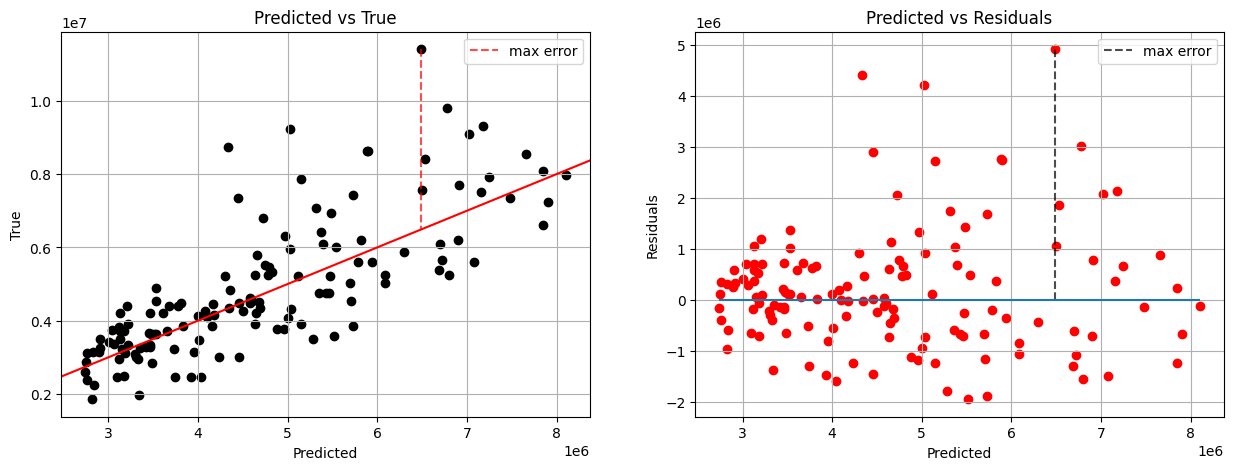

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [27]:
mask = num_feat

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
